# Machine Learning for physicists

## Backpropagation

How to choose the weights and biases? the answer will be by training with thousand of examples.
This is acually something like curve fitting. In simple one dimensional case, we can draw a curve by input-output pairs. We want a neural network to produce a smooth curve that goes through all data points as closely as possible. For example we want to fit a Lorentzian function that has two or three parameters to some spectrum. We find out the best parameters that make the deviation as small as possible. 
In the case of NN we have a thousand of input neurons and thousands of hidden layer neurons. If they are all connected, we would have weight matrises of dimensions of the type 1000x1000. Therefore we have a million entries in weight matrix. So the question arises here how we can adapt million parameters that a nonlinear function has.     
The problem here is curve fitting with a million of parameters and how we can adapt these parameters in a smart way. 
We have to consider that for sucessfully fitting a function with so many parameters we need many data points. 

The goal is to adapt all weights to get closer to the correct output. So we look at the deviation that is the difference between what our NN outputs for a given input and what we should have as output for a given input. We need to find this difference and take the square of that. If we average this quadratic deviation over all possible inputs we can find cost function. The cost function is a single number that we get out by averaging the quadratic deviation over all input samples. This number should be as small as possible. The cost function is independet of input sample because it average over all possible input samples, but it obviously depends on the parameters w in the NN. So our task is to minimize the cost function. 

In general case, we get the correct weights by minimizing a function. In physics, this is similar to a function that represents potential. To find the minimum of this potential, particle should slide down the potential curev. Sliding down means that we need to calculate the negative gradient of potential  and particle moves along this negative gradient. In NN, weight is a high dimensional vector that contains all the million weights like a particle in a million dimensions and it can slide down the negative gradient of cost function until it stops in minimum. It  correcponds to the motion of an overdamped particle (a particle with a lot of friction where the velocity is proportional to the force instead of the acceleration is proportional to the force).  

<div>
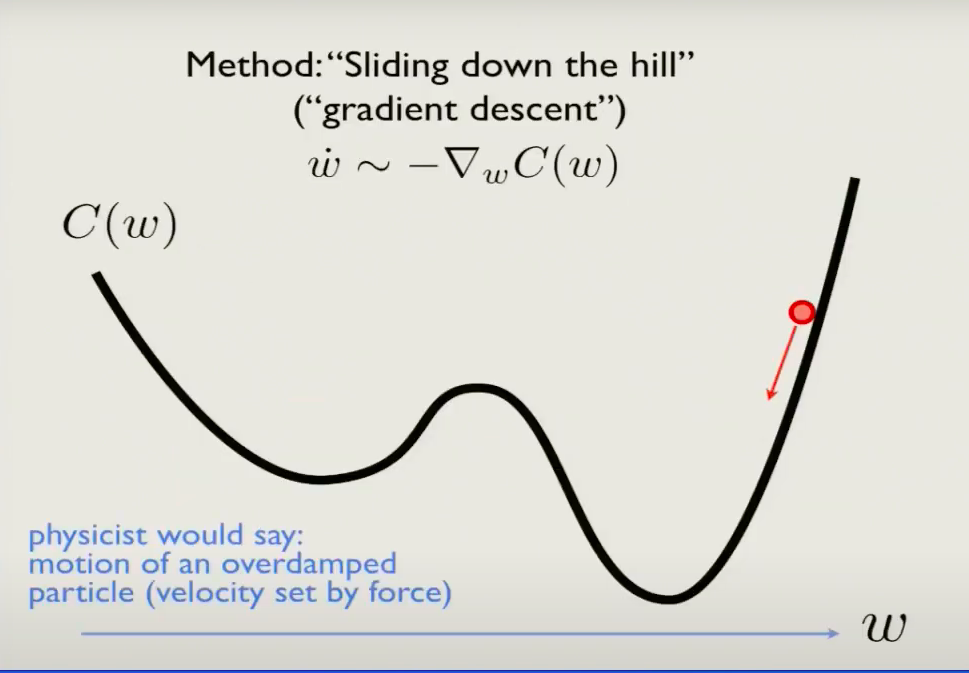
</div>

For an small network (two input neurons and one output neuron) we can calculate derivative of cost function by hand using the chain rule. 
 
Cahin rule :
($\frac{\partial C}{\partial w_j} =\frac{\partial C}{\partial z}. \frac{\partial z}{\partial w_j} $). 

$z = w_1y_1 + w_2y_2 + b$
z is linear part of our calculation and stick it into nonlinear function. We calculate cost function: first, we find the difference beween the NN output and the desired output, then take the square and finally average over all traing samples.

$C(w) = 1/2 \langle (f(z) - F(y_1,y_2))^2\rangle$

where C(w) is cost function, f(z) is network output and $F(y_1,y_2))$ is desired voutput.
We can take the gradient of cost function :
$\frac{\partial C}{ \partial w_1} = \langle (f(z) - F) f^{'}(z) \frac{\partial z}{\partial w_1}\rangle$ ,

$\frac{\partial z}{\partial w_1} = y_1$

Now we generalize this notation for full network that we call it backpropagation. The NN composed out of layers, so we need one index counts which layer we are in and within each layer we need another index that counts which neuron we are at. In the notation, $y_j^{n}$ n is the layer index and j is the number of the neuron inside the layer, $Z_j^{n}$ is linear superpositions, and finally the weights $w_{jk}^{n,n-1}$ where it is connection between neuron k in layer n-1 and neuron j in layer n. So the cost function $C(w) = \langle C(w,y^{in})\rangle$ is an average over a cost function that is defined per input. Then we calculate the derivative of this cost function with respect to particular weight denoted by w*.

$\frac{\partial C(w,y^{in})}{ \partial w*} = \sum^j (y_j^(n) - F_j(y^{in})) \frac{\partial y_j^{(n)}}{\partial w*}$
                            $= \sum_j (y_j^{(n)} - F_j(y^{in})) f^{'}(z_j^{(n)})\frac{\partial z_j^{(n)}}{\partial w*}$
                            
We apply chain rule repeatedly and find the derivative of z in layer n with respect to weight and we know that z in layer n depends on all the values of the neurons in one layer below :

$\frac{\partial z_j^{(n)}}{\partial w*} = \sum_k \frac{\partial z_j^{(n)}}{\partial y_k^{n-1}} \frac{\partial y_k^{(n-1)}}{\partial w*}$

 Rememeber that z is just linear superposition of the all values in one layer below and the derivative with respect to y returns the weight w, and again by appling chain rule once more so we have :
 $\frac{\partial z_j^{(n)}}{\partial w*} = \sum_k w_{jk}^{n,n-1} f^{'}(z_k^{n-1})\frac{\partial z_k^{(n-1)}}{\partial w*}$
 
again we have an expression $\frac{\partial z_k^{(n-1)}}{\partial w*}$ in the end  just like befor but in the layer (n-1). So we can iteratively go down layer by layer.

This expression $\sum_k w_{jk}^{n,n-1} f^{'}(z_k^{n-1})$ is nothing except a matrix-vector multiplication. The important point is that all this complicated cahin rule led to a matrix-vector multiplication and defined like :
$M_{jk}^{(n,n-1)} = w_{jk}^{(n,n-1) f^{'}(z_k^{(n-1)})}$. 

If we repeate matrix multiplication and go down the net we can obtain :
$\frac{\partial z_j^{(n)}}{\partial w*} = \sum_{k,l,...,u,v} M_{jk}^{n,n-1}M_{kl}^{n-1,n-2}...M_{uv}^{\tilde n+1,\tilde n} \frac{\partial z_v^{(\tilde n)}}{\partial w*}$.

The derivative process has to stop finally when we ecounter the weight with respect to which we wanted to calculate.
That means if w* is a real weight then we have $\frac{\partial z_j^{(\tilde n)}}{\partial w_{jk}^{\tilde n, \tilde n_1}} = y_k^{(\tilde n-1)}$.
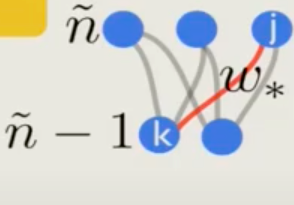

To summarize this algorithm which is called backpropagation, we start by initializing a vector at the output layer that has two parts one comes from cost function and the other part is derivative. For each layer we multiply deviation vector with a matrix that impliments the derivative. In each layer if w* is equal to one of the weights that actually occur in the connection between two layers we are looking at, we can finally evaluate the derivative of the cost function with respect to this weight w*. 

In the physics perspective, we take an output that is not quite what we would like to be, then we want to pull the output in the correct direction. There is a force pulling at the output neurons and force propagate down the network and adjust all the weights.  

## Example for Gradient decent in physics :

Suppose we have a function that we call it the potential energy of the 12-6 Lennard-Jones potential:
 
 $E(r_{ij}) =  \frac{A}{r^{12}_{ij}} -  \frac{B}{ r^6_{ij}}$

To see gradient descent in action, let’s first import some libraries.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

For starter, we define our potential function:

In [47]:
def ljp(r, A, B):
    
    return A / np.power(r, 12) - B / np.power(r, 6)

The gradient of the potential energy surface with respect to $r_{ij}$ is given below:

$E(r_{ij}) = -12 \frac{A}{r^{13}_{ij}} +6  \frac{B}{ r^7_{ij}}$ 

We want to find the minimum of energy with respect to distance $r_{ij}$. 

The next step is to write a function for first derivative of potential:

In [2]:
def first_derivative(r,A,B):
    """
    The first derivative of the Lennard-Jones potential model. 
    
    Args:
        r (float): Atom-atom distance (Å).
        A (float): Interaction parameter (eVÅ^12).
        B (float): Interaction parameter (eVÅ^6).
        
    Returns:
        (float): Potential energy.
    """
    
    return -12. * A/r**13 + 6. * B/ r**7

Step of algorithm is as follow:
We first guess initial $r_{ij}$ that we suppose energy to be minimum here, second we calculate the first derivative of energy in this distance. Third, we update the distance by $r_{new} = r_{old} - \alpha E^{'}(r_{ij})$, where, 𝐸′(𝑟) is the first derivative of the energy, $𝑟_{old}$ is the original distance, and $\alpha$ is a hyperparameter.
Then we return back to second step.
For example:
we considere here $r_{ij} = 6 A^o $ and $\alpha = 100$.

In [3]:
A = 1e5
B = 40
alpha = 100
r = 6.0
r_list = [r]
for i in range(30):
    E_dash = first_derivative(r, A, B)
    r = r - alpha * E_dash
    r_list.append(r)

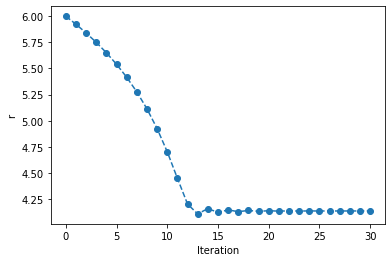

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(31), r_list, 'o--')
plt.xlabel('Iteration')
plt.ylabel('r')
plt.show()

We can see after some iteration our distance is converged.

For better look at the problem we define python functions for plotting our potential function and the learning path during the optimization process.

In [89]:
def plotFunc(r0,A,B):
    r = np.linspace(3.5, 10, 100)
    plt.plot(r, ljp(r,A,B))
    plt.plot(r0, ljp(r0,A,B), 'ro')
    plt.xlabel('$r_{ij}/Å$')
    plt.ylabel('$E(r)eV$')
    plt.title('potential curve')

def plotPath(rs, es, r0):
    plotFunc(r0,A,B)
    plt.plot(rs, es, linestyle='--', marker='o', color='orange')
    plt.plot(rs[-1], es[-1], 'ro')

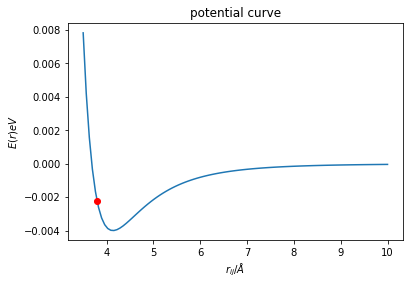

In [90]:
r0 = 3.8
A = 1e5
B = 40
plotFunc(r0,A,B)

Now we impliment a simple gradient decent algorithm as explainted above :

In [84]:
def GradientDescentSimple(ljp,first_derivative,A ,B , r0, alpha, tol=1e-5, max_iter=1000):
    # initialize r, E(r), and E'(r)
    rk = r0
    ek = ljp(rk,A,B)
    pk = first_derivative(rk,A,B)
    # initialize number of steps, save r and E(r)
    num_iter = 0
    curve_r = [rk]
    curve_e = [ek]
    # take steps
    while abs(pk) > tol and num_iter < max_iter:
        # calculate new r, E(r), and E'(r)
        rk = rk - alpha * pk
        ek = ljp(rk,A,B)
        pk = first_derivative(rk,A,B)
        # increase number of steps by 1, save new r and E(r)
        num_iter += 1
        curve_r.append(rk)
        curve_e.append(ek)
    # print results
    if num_iter == max_iter:
        print('Gradient descent does not converge.')
    else:
        print('Solution found:\n  E = {:.4f}\n  r = {:.4f}'.format(ek, rk))
    
    return curve_r, curve_e

Solution found:
  E = -0.0040
  r = 4.1356


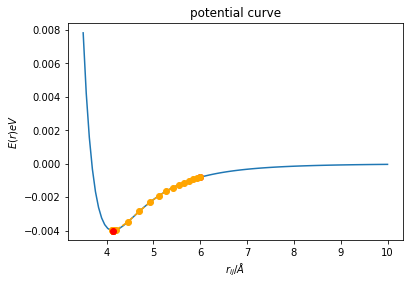

In [91]:
r0 = 6 ## our initial guess
A = 1e5 ## A in potential equation
B = 40  ## B in potential equation
rs, es = GradientDescentSimple(ljp, first_derivative,A,B ,r0, alpha=100)
plotPath(rs, es, r0)

https://towardsdatascience.com/complete-step-by-step-gradient-descent-algorithm-from-scratch-acba013e8420